In [1]:
# Descargamos he instalamos la libreria de tensorflow

!git clone https://github.com/google-research/perceptual-quality.git
%cd perceptual-quality
!pip install -e ./

Cloning into 'perceptual-quality'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 89 (delta 48), reused 72 (delta 31), pack-reused 0
Receiving objects: 100% (89/89), 42.93 KiB | 3.07 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/perceptual-quality
Obtaining file:///content/perceptual-quality
  Preparing metadata (setup.py) ... done
  Running setup.py develop for perceptual-quality


In [2]:
import os, sys
sys.path.append(os.getcwd())
from perceptual_quality import nlpd

In [3]:
%cd ..

/content


# Aplicamos la distancia

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Las imagenes tiene que ir entre [0-255]
import requests
from PIL import Image

url = "https://www.uv.es/lapeva/Valero_2001.jpg"
im = np.array(Image.open(requests.get(url, stream=True).raw))

print(im.shape,im.min(),im.max())

(264, 212, 3) 7 237


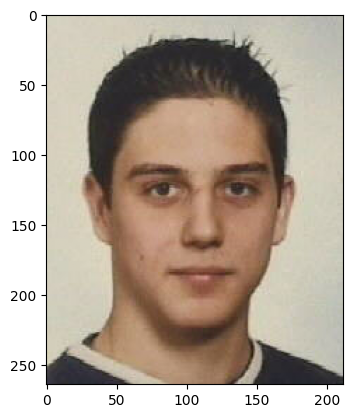

In [6]:
plt.figure()
plt.imshow(im/255)
plt.show()

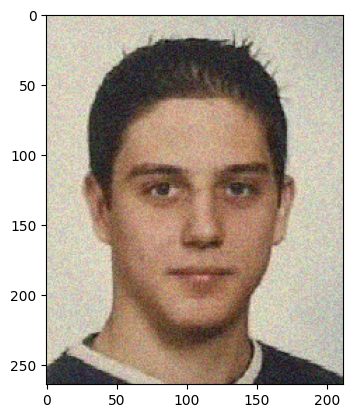

In [7]:
noise_level = 50
im_n = im + noise_level*np.random.rand(im.shape[0],im.shape[1],im.shape[2]) - noise_level/2
plt.figure()
plt.imshow(im_n/255)
plt.show()

In [8]:
import tensorflow as tf

In [9]:
random_image_A_tf = tf.image.resize(im,(256,256))
random_image_A_tf = tf.expand_dims(tf.cast(random_image_A_tf,tf.float64), axis= 0)

random_image_B_tf = tf.image.resize(im_n,(256,256))
random_image_B_tf = tf.expand_dims(tf.cast(random_image_B_tf,tf.float64), axis= 0)

In [10]:
random_image_A_tf.shape

TensorShape([1, 256, 256, 3])

In [11]:
nlpd.nlpd(random_image_A_tf, random_image_B_tf)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.13426587, 0.13446003, 0.1335901 ]], dtype=float32)>

In [12]:
np.mean(nlpd.nlpd(random_image_A_tf, random_image_B_tf).numpy())

0.13410534